<h1><center>NYC Pre-kindergarten Programs</center. </h1>

The New York City Department of Education (NYCDOE) publishes School Quality Report Results, The Quality Review is a process that evaluates how well schools are organized to support student learning and teacher practice. It was developed to assist New York City Department of Education schools in raising student achievement by looking behind a school’s performance statistics to ensure that the school is engaged in effective methods of accelerating student learning.

In this notebook, I identify the top Pre-Kindergarten programs based on the survey results from parents and teachers, explore the relationship between the survey results and enrollment and map the top schools.  


In [473]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')

In [474]:
url = 'https://data.cityofnewyork.us/resource/ex44-ct2x.json'

In [475]:
df  = pd.read_json(url)

In [476]:
df.head(2)

,siteid,program_code,name,site_address_1,city_state_zip,program_type,enrollment,daily_start_time,length_of_pre_k_day,early_drop_off_available,...,ecers_activities_rating,ecers_personal_care_routines,ecers_personal_care_routines_1,ecers_space_furnishings_score,ecers_space_furnishings_rating,ecers_program_structure_score,ecers_program_structure_rating,quality_review_dates_of_review,quality_review_how_well_do,duallanguage
0,01M015,01M015,P.S. 015 Roberto Clemente,333 East 4 Street,"New York, NY 10009",District School,17.0,1899-12-31 08:40:00,Full day,Contact Program,...,2.0,2.7,3.0,3.5,3.0,3.3,2.0,2017-03-01T00:00:00.000,3.0,NaN
1,01M019,01M019,P.S. 019 Asher Levy,185 First Avenue,"New York, NY 10003",District School,13.0,1899-12-31 08:00:00,Full day,No,...,3.0,2.7,3.0,3.1,2.0,2.3,1.0,2016-10-01T00:00:00.000,4.0,NaN


<h3> Data cleansing and exploration </h3>

##### Filter the schools to get those with parent and teacher ratings greater than 90

In [477]:
# Create a new dataframe by filtering the data 
parent_filter = df['survey_guardian_response'] >90
teacher_filter = df['collaborative_teachers_survey']>90
top_school_filter = parent_filter & teacher_filter
top_schools = df[top_school_filter]

In [478]:
# Check the size of the dataframe
top_schools.shape

(100, 45)

In [479]:
#Check to make sure data looks good
top_schools.head(3)

,siteid,program_code,name,site_address_1,city_state_zip,program_type,enrollment,daily_start_time,length_of_pre_k_day,early_drop_off_available,...,ecers_activities_rating,ecers_personal_care_routines,ecers_personal_care_routines_1,ecers_space_furnishings_score,ecers_space_furnishings_rating,ecers_program_structure_score,ecers_program_structure_rating,quality_review_dates_of_review,quality_review_how_well_do,duallanguage
10,01M188,01M188,P.S. 188 The Island School,442 EAST HOUSTON STREET,"New York, NY 10002",District School,19.0,1899-12-31 08:30:00,Full day,No,...,3.0,2.0,2.0,4.3,3.0,1.7,1.0,2016-01-21T00:00:00.000,3.0,Dual Language (Spanish)
22,02M042,02M042,P.S. 042 Benjamin Altman,71 HESTER STREET,"New York, NY 10002",District School,42.0,1899-12-31 08:20:00,Full day,Contact Program,...,4.0,3.0,3.0,4.9,3.0,2.7,1.0,NaN,NaN,NaN
30,02M130,02M130,P.S. 130 Hernando De Soto,143 BAXTER STREET,"New York, NY 10013",District School,36.0,1899-12-31 08:15:00,Full day,No,...,3.0,3.0,3.0,3.9,3.0,4.5,3.0,NaN,NaN,NaN


In [480]:
top_schools['parent_part_rate'] = top_schools['survey_of_guardian_responses']/top_schools['enrollment']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


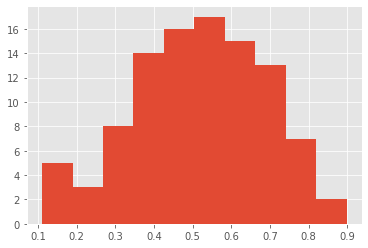

In [481]:
top_schools['parent_part_rate'].hist()

In [482]:
top_schools['parent_part_rate'].describe()

count    100.000000
mean       0.515898
std        0.168394
min        0.111111
25%        0.391340
50%        0.527778
75%        0.640278
max        0.898148
Name: parent_part_rate, dtype: float64

#### Determine if values are NaN

In [483]:
# Determine if the dataframe has any NaN values
top_schools.isna().any()

siteid                            False
program_code                      False
name                              False
site_address_1                    False
city_state_zip                    False
program_type                      False
enrollment                        False
daily_start_time                  False
length_of_pre_k_day               False
early_drop_off_available          False
late_pick_up_available            False
meals                             False
playspace                         False
collaborative_teachers_survey     False
site_supportive_environment        True
site_effective_leadership          True
site_strong_family_ties_survey     True
site_trust_survey_percent          True
survey_of_guardian_responses      False
survey_guardian_response          False
class_most_recent                 False
class_emotional_support_score      True
class_emotional_support_rating     True
class_classroom_organization       True
class_classrooom_organization      True


In [484]:
# Drop the NaN values if the entire row is NaN
top_schools.dropna(inplace = True, how = 'all')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [485]:
top_schools.shape

(100, 46)

In [486]:
top_schools

,siteid,program_code,name,site_address_1,city_state_zip,program_type,enrollment,daily_start_time,length_of_pre_k_day,early_drop_off_available,...,ecers_personal_care_routines,ecers_personal_care_routines_1,ecers_space_furnishings_score,ecers_space_furnishings_rating,ecers_program_structure_score,ecers_program_structure_rating,quality_review_dates_of_review,quality_review_how_well_do,duallanguage,parent_part_rate
10,01M188,01M188,P.S. 188 The Island School,442 EAST HOUSTON STREET,"New York, NY 10002",District School,19.0,1899-12-31 08:30:00,Full day,No,...,2.0,2.0,4.3,3.0,1.7,1.0,2016-01-21T00:00:00.000,3.0,Dual Language (Spanish),0.315789
22,02M042,02M042,P.S. 042 Benjamin Altman,71 HESTER STREET,"New York, NY 10002",District School,42.0,1899-12-31 08:20:00,Full day,Contact Program,...,3.0,3.0,4.9,3.0,2.7,1.0,NaN,NaN,NaN,0.714286
30,02M130,02M130,P.S. 130 Hernando De Soto,143 BAXTER STREET,"New York, NY 10013",District School,36.0,1899-12-31 08:15:00,Full day,No,...,3.0,3.0,3.9,3.0,4.5,3.0,NaN,NaN,NaN,0.527778
36,02M212,02M212,P.S. 212 Midtown West,328 West 48 Street,"New York, NY 10036",District School,36.0,1899-12-31 08:40:00,Full day,No,...,1.8,2.0,2.5,1.0,3.3,2.0,NaN,NaN,NaN,0.583333
56,04M037,04M037,River East Elementary,508 East 120 Street,"New York, NY 10035",District School,17.0,1899-12-31 08:00:00,Full day,Yes,...,4.5,4.0,4.4,3.0,5.3,4.0,2015-11-17T00:00:00.000,4.0,NaN,0.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,31R065,31R065,P.S. 65 The Academy of Innovative Learning,98 GRANT STREET,"Staten Island, NY 10301",District School,36.0,1899-12-31 08:15:00,Full day,Yes,...,2.2,2.0,3.9,3.0,3.8,3.0,2016-04-20T00:00:00.000,3.0,NaN,0.583333
560,32K123,32K123,P.S. 123 Suydam,100 IRVING AVENUE,"Brooklyn, NY 11237",District School,35.0,1899-12-31 08:00:00,Full day,Contact Program,...,2.3,3.0,4.9,3.0,3.7,3.0,2018-02-01T00:00:00.000,4.0,Dual Language (Spanish),0.685714
566,84K362,84K362,Hellenic Classical Charter School,646 5 Avenue,"Brooklyn, NY 11215",Charter School,18.0,1899-12-31 08:20:00,Full day,Contact Program,...,2.3,3.0,4.3,3.0,5.0,4.0,NaN,NaN,NaN,0.388889
575,84X394,84X394,Little Haven at Mott Haven Academy Charter School,170 Brown Place,"Bronx, NY 10454",Charter School,36.0,1899-12-31 08:00:00,Full day,No,...,4.0,4.0,3.6,3.0,6.3,4.0,NaN,NaN,NaN,0.361111


Let's create a zip code field

In [487]:
top_schools['zip'] = df['city_state_zip'].str.extract(r'(\d{5})')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Let's get summary statistics on the fields we are interested in

In [488]:
top_schools[['enrollment','survey_of_guardian_responses','collaborative_teachers_survey']].describe()

,enrollment,survey_of_guardian_responses,collaborative_teachers_survey
count,100.000000,100.000000,100.000000
mean,36.110000,19.310000,94.220000
std,16.346559,12.762552,2.427036
min,11.000000,2.000000,91.000000
25%,23.250000,11.000000,92.000000
50%,35.500000,18.000000,94.000000
75%,43.500000,25.000000,96.000000
max,108.000000,97.000000,100.000000


#### The teachers survey scores are a slightly lower than the parents survey. The range of programs is from 11 to 108 students. Based on the average and median of the enrollment data, it looks like there is an outlier. 

#### Determine which school is the outlier. Perhaps they have some best practices that they can share to get the parents to submit the survey responses. 

In [489]:
top_schools.loc[top_schools['enrollment'].idxmax()]

siteid                                                        27Q316
program_code                                                  27Q316
name                              Queens Explorers Elementary School
site_address_1                                      90-07 101 Avenue
city_state_zip                                  OZONE PARK, NY 11416
program_type                                         District School
enrollment                                                       108
daily_start_time                                 1899-12-31 08:00:00
length_of_pre_k_day                                         Full day
early_drop_off_available                             Contact Program
late_pick_up_available                               Contact Program
meals                                                Breakfast/Lunch
playspace                          Indoor/Outdoor (onsite) playspace
collaborative_teachers_survey                                     94
site_supportive_environment       

In [490]:
top_schools.set_index('siteid')

,program_code,name,site_address_1,city_state_zip,program_type,enrollment,daily_start_time,length_of_pre_k_day,early_drop_off_available,late_pick_up_available,...,ecers_personal_care_routines_1,ecers_space_furnishings_score,ecers_space_furnishings_rating,ecers_program_structure_score,ecers_program_structure_rating,quality_review_dates_of_review,quality_review_how_well_do,duallanguage,parent_part_rate,zip
siteid,,,,,,,,,,,,,,,,,,,,,
01M188,01M188,P.S. 188 The Island School,442 EAST HOUSTON STREET,"New York, NY 10002",District School,19.0,1899-12-31 08:30:00,Full day,No,No,...,2.0,4.3,3.0,1.7,1.0,2016-01-21T00:00:00.000,3.0,Dual Language (Spanish),0.315789,10002
02M042,02M042,P.S. 042 Benjamin Altman,71 HESTER STREET,"New York, NY 10002",District School,42.0,1899-12-31 08:20:00,Full day,Contact Program,Yes,...,3.0,4.9,3.0,2.7,1.0,NaN,NaN,NaN,0.714286,10002
02M130,02M130,P.S. 130 Hernando De Soto,143 BAXTER STREET,"New York, NY 10013",District School,36.0,1899-12-31 08:15:00,Full day,No,No,...,3.0,3.9,3.0,4.5,3.0,NaN,NaN,NaN,0.527778,10013
02M212,02M212,P.S. 212 Midtown West,328 West 48 Street,"New York, NY 10036",District School,36.0,1899-12-31 08:40:00,Full day,No,No,...,2.0,2.5,1.0,3.3,2.0,NaN,NaN,NaN,0.583333,10036
04M037,04M037,River East Elementary,508 East 120 Street,"New York, NY 10035",District School,17.0,1899-12-31 08:00:00,Full day,Yes,No,...,4.0,4.4,3.0,5.3,4.0,2015-11-17T00:00:00.000,4.0,NaN,0.705882,10035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31R065,31R065,P.S. 65 The Academy of Innovative Learning,98 GRANT STREET,"Staten Island, NY 10301",District School,36.0,1899-12-31 08:15:00,Full day,Yes,Contact Program,...,2.0,3.9,3.0,3.8,3.0,2016-04-20T00:00:00.000,3.0,NaN,0.583333,10301
32K123,32K123,P.S. 123 Suydam,100 IRVING AVENUE,"Brooklyn, NY 11237",District School,35.0,1899-12-31 08:00:00,Full day,Contact Program,Contact Program,...,3.0,4.9,3.0,3.7,3.0,2018-02-01T00:00:00.000,4.0,Dual Language (Spanish),0.685714,11237
84K362,84K362,Hellenic Classical Charter School,646 5 Avenue,"Brooklyn, NY 11215",Charter School,18.0,1899-12-31 08:20:00,Full day,Contact Program,Contact Program,...,3.0,4.3,3.0,5.0,4.0,NaN,NaN,NaN,0.388889,11215


#### Create new dataframe that excludes the outlier

In [491]:
top_schools = top_schools[top_schools.name != 'Queens Explorers Elementary School']

### What is the correlation between these two groups of responses? 

In [492]:
top_schools['enrollment'].corr(top_schools['survey_of_guardian_responses'])

0.8363184655722664

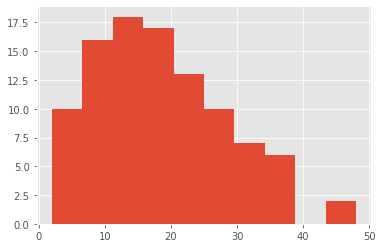

In [493]:
top_schools['survey_of_guardian_responses'].hist()

#### Let's explore the relationship between parents scores and enrollment with a scatterplot and a regression line and confidence interval. 

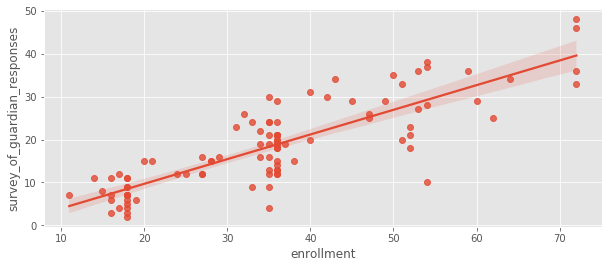

In [494]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
x= top_schools['enrollment']
y = top_schools['survey_of_guardian_responses'] 
sns.regplot(x = x ,y=y,ci=95, data = df)

The above plot generally shows a linear relationship and that schools with a smaller enrollment also received lower scores from the parents. There is also a significant variance in the data. 

In [495]:
msk = np.random.rand(len(top_schools)) < 0.75
train = top_schools[msk]
test = top_schools[~msk]

In [496]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['enrollment']])
train_y = np.asanyarray(train[['survey_of_guardian_responses']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.58350667]]
Intercept:  [-2.14015101]


### How did the model perform?
Comparison of the actual values and predicted values to calculate the accuracy of a regression model. 

In [497]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(top_schools[['enrollment']])
test_y = np.asanyarray(top_schools[['survey_of_guardian_responses']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 4.28
Residual sum of squares (MSE): 30.46
R2-score: 0.58


In [498]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(test_y,test_y_hat, sample_weight=None, multioutput='uniform_average', squared=True)
MSE

30.464617103289726

In [464]:
top_schools['parent_part_rate'].describe()

count    99.000000
mean      0.512036
std       0.164742
min       0.111111
25%       0.390523
50%       0.527778
75%       0.637626
max       0.857143
Name: parent_part_rate, dtype: float64

### Would SVM Yield any better results?

In [468]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, X, y, cv=5)
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.15      , 0.25      , 0.25      , 0.45      , 0.21052632])

In [470]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.26 (+/- 0.20)


With a .26 accuracy, SVM is not a good option for this data

In [109]:
top_schools.set_index('siteid')

,program_code,name,site_address_1,city_state_zip,program_type,enrollment,daily_start_time,length_of_pre_k_day,early_drop_off_available,late_pick_up_available,...,ecers_personal_care_routines,ecers_personal_care_routines_1,ecers_space_furnishings_score,ecers_space_furnishings_rating,ecers_program_structure_score,ecers_program_structure_rating,quality_review_dates_of_review,quality_review_how_well_do,duallanguage,zip
siteid,,,,,,,,,,,,,,,,,,,,,
01M188,01M188,P.S. 188 The Island School,442 EAST HOUSTON STREET,"New York, NY 10002",District School,19.0,1899-12-31 08:30:00,Full day,No,No,...,2.0,2.0,4.3,3.0,1.7,1.0,2016-01-21T00:00:00.000,3.0,Dual Language (Spanish),10002
02M042,02M042,P.S. 042 Benjamin Altman,71 HESTER STREET,"New York, NY 10002",District School,42.0,1899-12-31 08:20:00,Full day,Contact Program,Yes,...,3.0,3.0,4.9,3.0,2.7,1.0,NaN,NaN,NaN,10002
02M130,02M130,P.S. 130 Hernando De Soto,143 BAXTER STREET,"New York, NY 10013",District School,36.0,1899-12-31 08:15:00,Full day,No,No,...,3.0,3.0,3.9,3.0,4.5,3.0,NaN,NaN,NaN,10013
02M212,02M212,P.S. 212 Midtown West,328 West 48 Street,"New York, NY 10036",District School,36.0,1899-12-31 08:40:00,Full day,No,No,...,1.8,2.0,2.5,1.0,3.3,2.0,NaN,NaN,NaN,10036
04M037,04M037,River East Elementary,508 East 120 Street,"New York, NY 10035",District School,17.0,1899-12-31 08:00:00,Full day,Yes,No,...,4.5,4.0,4.4,3.0,5.3,4.0,2015-11-17T00:00:00.000,4.0,NaN,10035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31R065,31R065,P.S. 65 The Academy of Innovative Learning,98 GRANT STREET,"Staten Island, NY 10301",District School,36.0,1899-12-31 08:15:00,Full day,Yes,Contact Program,...,2.2,2.0,3.9,3.0,3.8,3.0,2016-04-20T00:00:00.000,3.0,NaN,10301
32K123,32K123,P.S. 123 Suydam,100 IRVING AVENUE,"Brooklyn, NY 11237",District School,35.0,1899-12-31 08:00:00,Full day,Contact Program,Contact Program,...,2.3,3.0,4.9,3.0,3.7,3.0,2018-02-01T00:00:00.000,4.0,Dual Language (Spanish),11237
84K362,84K362,Hellenic Classical Charter School,646 5 Avenue,"Brooklyn, NY 11215",Charter School,18.0,1899-12-31 08:20:00,Full day,Contact Program,Contact Program,...,2.3,3.0,4.3,3.0,5.0,4.0,NaN,NaN,NaN,11215


### Cluster schools by ECFR  Early Childhood Environment Rating Scale Scores. 
This scale is used to assess  programs for preschool-kindergarten aged children, from 2 through 5 years of age.  

In [402]:
numeric_list = top_schools.select_dtypes(np.number)

In [403]:
new_df = top_schools.select_dtypes(include=[np.number])

In [404]:
new_df = top_schools

In [405]:
new_df.dropna(inplace = True, how = 'all')

In [408]:
from sklearn.preprocessing import StandardScaler
X = numeric_list
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.11872498,  2.38068959,  0.34427626, ..., -1.39359936,
         0.62329304, -1.19730319],
       [ 0.45176625, -0.09156498,  0.34427626, ..., -1.39359936,
        -1.17396942,  1.23392344],
       [ 0.04207289, -0.09156498,  0.13205117, ...,  0.35280997,
        -1.17396942,  0.09603802],
       ...,
       [-1.18700721,  1.1445623 ,  0.34427626, ...,  1.22601463,
        -1.17396942, -0.75132346],
       [ 0.04207289, -0.91564984,  0.34427626, ...,  1.22601463,
        -1.17396942, -0.92079576],
       [-1.18700721, -0.91564984,  0.34427626, ...,  0.35280997,
        -1.17396942, -0.75132346]])

In [409]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 2 2 1 1 2 2 0 0 1 1 0 0 2 2 2 1 0 0 2 1 1 2 2 0 2 2 2 1 1 1 1 2 2 0 0
 1 0 0 2 2 0 0 2 1 1 2 2 1 1 2 2 0 0 2 2 0 1 2 1 2 2 1 2 2 2 0 1 2 2 2 0 1
 0 0 2 2 0 0 0 0 2 2 2 1 2 2 1 1 1 2 2 1 2 2 1 2 1]


### Dataframe with custer labels included

In [410]:
new_df["Clus_km"] = labels
new_df.head(5)

,siteid,program_code,name,site_address_1,city_state_zip,program_type,enrollment,daily_start_time,length_of_pre_k_day,early_drop_off_available,...,ecers_space_furnishings_score,ecers_space_furnishings_rating,ecers_program_structure_score,ecers_program_structure_rating,quality_review_dates_of_review,quality_review_how_well_do,duallanguage,parent_part_rate,zip,Clus_km
10,01M188,01M188,P.S. 188 The Island School,442 EAST HOUSTON STREET,"New York, NY 10002",District School,19.0,1899-12-31 08:30:00,Full day,No,...,4.3,3.0,1.7,1.0,2016-01-21T00:00:00.000,3.0,Dual Language (Spanish),0.315789,10002,1
22,02M042,02M042,P.S. 042 Benjamin Altman,71 HESTER STREET,"New York, NY 10002",District School,42.0,1899-12-31 08:20:00,Full day,Contact Program,...,4.9,3.0,2.7,1.0,NaN,NaN,NaN,0.714286,10002,2
30,02M130,02M130,P.S. 130 Hernando De Soto,143 BAXTER STREET,"New York, NY 10013",District School,36.0,1899-12-31 08:15:00,Full day,No,...,3.9,3.0,4.5,3.0,NaN,NaN,NaN,0.527778,10013,2
36,02M212,02M212,P.S. 212 Midtown West,328 West 48 Street,"New York, NY 10036",District School,36.0,1899-12-31 08:40:00,Full day,No,...,2.5,1.0,3.3,2.0,NaN,NaN,NaN,0.583333,10036,2
56,04M037,04M037,River East Elementary,508 East 120 Street,"New York, NY 10035",District School,17.0,1899-12-31 08:00:00,Full day,Yes,...,4.4,3.0,5.3,4.0,2015-11-17T00:00:00.000,4.0,NaN,0.705882,10035,1


How many schools are in each cluster?

In [411]:
new_df['Clus_km'].value_counts()

2    46
1    29
0    24
Name: Clus_km, dtype: int64

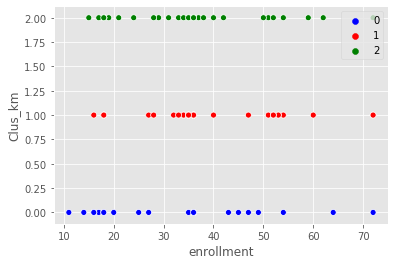

In [454]:
A= new_df['enrollment']
B = new_df['Clus_km']
clus_id = new_df['Clus_km'] = km.labels_
dic = {0:"Blue", 1:"Red", 2:"Green"}
sns.scatterplot(x=A, y=B, data=new_df, hue=clus_id, palette = dic)



#### How does the intersection of the teachers survey, parents survey and enrollment look?
We can see from the below graph that there is a clear deliniation by the parent response rate with those with a score above .6 making up most of one cluster while those with a score above a .4 are part of another cluster. The last cluster has the most variation among the axes.

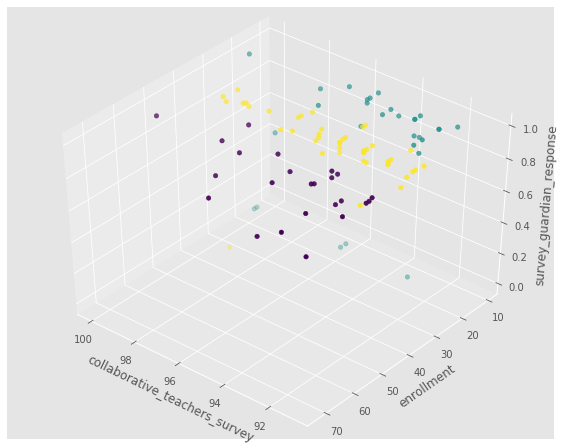

In [501]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=42, azim=130)

plt.cla()

ax.set_zlabel('survey_guardian_response')
ax.set_xlabel('collaborative_teachers_survey')
ax.set_ylabel('enrollment')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## Below is a map of the top pre-K programs 

Data preparaton

In [48]:
schools = top_schools[['name', 'site_address_1', 'city_state_zip',
       'program_type', 'enrollment', 'daily_start_time', 'length_of_pre_k_day',
       'early_drop_off_available', 'late_pick_up_available', 'meals',
       'playspace']]

In [49]:
schools.shape

(99, 11)

In [51]:
schools[['site_address_1','city_state_zip']].astype(str)

,site_address_1,city_state_zip
10,442 EAST HOUSTON STREET,"New York, NY 10002"
22,71 HESTER STREET,"New York, NY 10002"
30,143 BAXTER STREET,"New York, NY 10013"
36,328 West 48 Street,"New York, NY 10036"
56,508 East 120 Street,"New York, NY 10035"
...,...,...
551,98 GRANT STREET,"Staten Island, NY 10301"
560,100 IRVING AVENUE,"Brooklyn, NY 11237"
566,646 5 Avenue,"Brooklyn, NY 11215"
575,170 Brown Place,"Bronx, NY 10454"


In [52]:
schools['address'] = schools['site_address_1'] +' '+ schools['city_state_zip']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
schools['address']

10     442 EAST HOUSTON STREET New York, NY 10002
22            71 HESTER STREET New York, NY 10002
30           143 BAXTER STREET New York, NY 10013
36          328 West 48 Street New York, NY 10036
56         508 East 120 Street New York, NY 10035
                          ...                    
551       98 GRANT STREET Staten Island, NY 10301
560          100 IRVING AVENUE Brooklyn, NY 11237
566               646 5 Avenue Brooklyn, NY 11215
575               170 Brown Place Bronx, NY 10454
578        3740 Baychester Avenue Bronx, NY 10466
Name: address, Length: 99, dtype: object

Get location data

In [54]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [55]:
geolocator = Nominatim(user_agent="ny_explorer")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [56]:
schools['location'] = schools['address'].apply(geocode)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
schools['point'] = schools['location'].apply(lambda loc: tuple(loc.point) if loc else np.nan)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


The below cells clean up the latitude, longitude and altitude data provided by geopy

In [58]:
schools['coordinates'] = list(schools['point'])
school_coordinates  = schools[['name', 'coordinates']]
school_coordinates['coordinates'] = school_coordinates['coordinates'].astype(str)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
x = school_coordinates['coordinates'].str.split(expand = True)
x.rename(columns = {0:'latitude', 1:'longitude', 2: 'altitude'}, inplace = True)
x.drop(['altitude'], axis=1, inplace = True)

In [60]:
x['latitude'] = x['latitude'].str.strip("( ,")
x['latitude'] = x['latitude'].astype(float)

In [61]:
x['longitude'] = x['longitude'].str.strip("( ,")
x['longitude'] = x['longitude'].astype(float)

In [62]:
lat = x['latitude']
long = x['longitude']
x['coords'] = zip(lat, long)

In [63]:
df = school_coordinates.join(x, how = 'outer')

In [64]:
df.dropna(inplace = True)
df.set_index('name')
schools.set_index('name')

In [67]:
school_data = df.join(schools, lsuffix = 'name', how ='left')

In [197]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


## Map schools

In [69]:
import folium
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=10.25)
# add markers to map
for lat, lng, label in zip(school_data['latitude'], school_data['longitude'], school_data['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### Thank you for reviewing! Please stay safe and healthy!